# Construimos un algoritmo que arme una red según las especificaciones
En este caso será para una red con una sola capa oculta y con la posibilidad de escoger la funcion de activación de la capa oculta así como el número de nodos que tendrá. Los nodos de las capas de entrada y salida estarán definidos por los propios datos X,Y

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor
from keras import models
from keras import layers
from keras import optimizers


## Funciones de activación

In [2]:
# RELU
def relu(x):
    return x * (x > 0)

def drelu(x):
    return 1. * (x > 0)

#IDENTIDAD
def iden(X):
    return X
def diden(X):
    return 1

#SIGMOIDE
def sigmoid(X):
    return 1/(1+np.exp(-X))
def dsigmoid(X):
    return sigmoid(X)*(1-sigmoid(X))

#TANGENTE HIPORBÓLICA
def tanh(X):
    return np.tanh(X)
def dtanh(X):
    return 1-tanh(X)**2

#Definimos el forward propagation por si se quiere evaluar un determiado valor después de haber entrenado la red
def forward(X,W1,b1,W2,b2,activation):
    z1=np.dot(X,W1)+b1
    a1=activation(z1)
    z2=np.dot(a1,W2)+b2
    a2=z2
    return a2


## Minibatch
Toma el conjunto de datos X, Y y los separa en dos grupos, los datos que seránusados para el entrenamiento, y los que serán usados como validación.

Se le indicará el porcentaje que queremos para validación

In [3]:
def split(X,Y,porcent): #El porcentaje debe estar dado entre 0 y 1
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    
    return X_learn,Y_learn,X_val,Y_val


## Función de coste

In [4]:
#función de coste:
def error(C):
    m=len(C)
    e=(1/(2*m))*np.linalg.norm(C)**2
    return e

## Neural Network

In [5]:
def neuralnet(X,Y,nodos,batch_size,learning_rate,epocas,activation,dactivation):
    #Definimos la estructura de la red
    n_entradas=len(X[0])
    n_salidas=len(Y[0])
    
    #definimos los conjuntos de aprendizaje y validación 
    X_learn,Y_learn,X_val,Y_val = split(X,Y,batch_size)
    
    #forward
    W1=np.random.randn(n_entradas,nodos)
    W2=np.random.randn(nodos,n_salidas)
    b1=np.random.randn(nodos)
    b2=np.random.randn(n_salidas)
    
    #z1=np.dot(X_learn,W1)+b1
    #a1=activation(z1)
    #z2=np.dot(a1,W2)+b2
    #a2=z2
    
    #épocas
    errores=[]
    validacion=[]
    for i in range(epocas+1):
        #Forward
        z1=np.dot(X_learn,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        
        #backpropagation
        delta2 = a2-Y_learn
        delta1 = (delta2).dot(W2.T)*dactivation(z1)
        
        errores.append(error(delta2)) #guardamos el error de cada época

        W2 -= learning_rate * a1.T.dot(delta2)
        b2 -= learning_rate * (delta2).sum(axis=0)

        W1 -= learning_rate * X_learn.T.dot(delta1)
        b1 -= learning_rate * (delta1).sum(axis=0)
        print("Época %d, coste %f" %(int(i),error(delta2)))
        
        #Ahora validamos el modelo
        z1=np.dot(X_val,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        delta = a2-Y_val
        validacion.append(error(delta))
        
    plt.plot(range(i+1),errores,color='darkcyan',label='Aprendizaje')
    plt.plot(range(i+1),validacion,color='darkred',label='Validación')
    plt.grid()
    plt.legend()
    return W1,b1,W2,b2
        
        

## Red con keras

In [23]:
def redk(X,Y,nodos,split_size,learning_rate,epocas):
    #Separamos los datos en validación y entrenamiento
    X_learn,Y_learn,X_val,Y_val=split(X,Y,split_size)
    
    #Armamos el modelo con estructura 'Sequential'
    model=models.Sequential()

    #la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
    capa1=layers.Dense(nodos, input_shape=(len(X[0]),),use_bias=1,activation='sigmoid')
    #para la capa de salida usamos Id como activación
    salida=layers.Dense(len(Y[0]),use_bias=1)

    #armamos el modelo
    model.add(capa1)
    model.add(salida)
    #Ahora definimos el paso de compilación, con learning rate=0.001
    #Función de error cuadrático medio
    

    model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='mse')

    #por último traemos los datos de entrenamiento y los procesamos con 'fit()'
    history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),batch_size=64,epochs=epocas)
    
    error=history.history['loss']
    exac=history.history['val_loss']
    epochs=np.arange(0,len(error))
    plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
    plt.plot(epochs,exac,label='Error Validación',color='r')
    plt.title('Error durante el entrenamiento',color='red')
    plt.legend()
    plt.grid()
    

In [24]:
#Función a emular
def F(x):
    return np.sin(x)
X=3.14*2*np.random.rand(1000,1)
Y=[]
for x in X:
    y=F(x)
    y=y+np.random.uniform(-0.1,0.1)
    Y.append(y)
Y=np.array(Y)

Época 0, coste 154.969878
Época 1, coste 969.476180
Época 2, coste 4936.341060
Época 3, coste 10061.308983
Época 4, coste 316.351509
Época 5, coste 128.882773
Época 6, coste 73.331360
Época 7, coste 47.567653
Época 8, coste 33.626065
Época 9, coste 25.170852
Época 10, coste 19.467652
Época 11, coste 15.424096
Época 12, coste 12.457171
Época 13, coste 10.210641
Época 14, coste 8.471558
Época 15, coste 7.258413
Época 16, coste 6.350751
Época 17, coste 5.604409
Época 18, coste 4.982052
Época 19, coste 4.458315
Época 20, coste 4.010657
Época 21, coste 3.625892
Época 22, coste 3.292929
Época 23, coste 3.003229
Época 24, coste 2.750044
Época 25, coste 2.525716
Época 26, coste 2.326695
Época 27, coste 2.148548
Época 28, coste 1.988523
Época 29, coste 1.844620
Época 30, coste 1.714657
Época 31, coste 1.596899
Época 32, coste 1.490245
Época 33, coste 1.393120
Época 34, coste 1.304515
Época 35, coste 1.223337
Época 36, coste 1.148596
Época 37, coste 1.079765
Época 38, coste 1.016307
Época 39, co

Época 456, coste 0.039232
Época 457, coste 0.039150
Época 458, coste 0.039068
Época 459, coste 0.038986
Época 460, coste 0.038905
Época 461, coste 0.038824
Época 462, coste 0.038743
Época 463, coste 0.038663
Época 464, coste 0.038582
Época 465, coste 0.038502
Época 466, coste 0.038423
Época 467, coste 0.038344
Época 468, coste 0.038265
Época 469, coste 0.038186
Época 470, coste 0.038108
Época 471, coste 0.038029
Época 472, coste 0.037950
Época 473, coste 0.037871
Época 474, coste 0.037793
Época 475, coste 0.037715
Época 476, coste 0.037637
Época 477, coste 0.037560
Época 478, coste 0.037482
Época 479, coste 0.037406
Época 480, coste 0.037329
Época 481, coste 0.037253
Época 482, coste 0.037177
Época 483, coste 0.037101
Época 484, coste 0.037026
Época 485, coste 0.036951
Época 486, coste 0.036876
Época 487, coste 0.036802
Época 488, coste 0.036728
Época 489, coste 0.036654
Época 490, coste 0.036580
Época 491, coste 0.036506
Época 492, coste 0.036432
Época 493, coste 0.036359
Época 494, c

Época 940, coste 0.016989
Época 941, coste 0.016967
Época 942, coste 0.016945
Época 943, coste 0.016923
Época 944, coste 0.016901
Época 945, coste 0.016879
Época 946, coste 0.016857
Época 947, coste 0.016835
Época 948, coste 0.016813
Época 949, coste 0.016791
Época 950, coste 0.016770
Época 951, coste 0.016748
Época 952, coste 0.016726
Época 953, coste 0.016705
Época 954, coste 0.016683
Época 955, coste 0.016661
Época 956, coste 0.016640
Época 957, coste 0.016618
Época 958, coste 0.016597
Época 959, coste 0.016575
Época 960, coste 0.016554
Época 961, coste 0.016533
Época 962, coste 0.016511
Época 963, coste 0.016490
Época 964, coste 0.016469
Época 965, coste 0.016447
Época 966, coste 0.016426
Época 967, coste 0.016405
Época 968, coste 0.016384
Época 969, coste 0.016363
Época 970, coste 0.016341
Época 971, coste 0.016320
Época 972, coste 0.016299
Época 973, coste 0.016278
Época 974, coste 0.016258
Época 975, coste 0.016237
Época 976, coste 0.016216
Época 977, coste 0.016195
Época 978, c

Época 1403, coste 0.010523
Época 1404, coste 0.010515
Época 1405, coste 0.010507
Época 1406, coste 0.010498
Época 1407, coste 0.010490
Época 1408, coste 0.010482
Época 1409, coste 0.010473
Época 1410, coste 0.010465
Época 1411, coste 0.010457
Época 1412, coste 0.010448
Época 1413, coste 0.010440
Época 1414, coste 0.010432
Época 1415, coste 0.010423
Época 1416, coste 0.010415
Época 1417, coste 0.010407
Época 1418, coste 0.010399
Época 1419, coste 0.010390
Época 1420, coste 0.010382
Época 1421, coste 0.010374
Época 1422, coste 0.010366
Época 1423, coste 0.010358
Época 1424, coste 0.010350
Época 1425, coste 0.010342
Época 1426, coste 0.010334
Época 1427, coste 0.010326
Época 1428, coste 0.010318
Época 1429, coste 0.010309
Época 1430, coste 0.010301
Época 1431, coste 0.010293
Época 1432, coste 0.010285
Época 1433, coste 0.010277
Época 1434, coste 0.010269
Época 1435, coste 0.010261
Época 1436, coste 0.010253
Época 1437, coste 0.010245
Época 1438, coste 0.010238
Época 1439, coste 0.010230
É

Época 1931, coste 0.007644
Época 1932, coste 0.007641
Época 1933, coste 0.007637
Época 1934, coste 0.007634
Época 1935, coste 0.007631
Época 1936, coste 0.007627
Época 1937, coste 0.007624
Época 1938, coste 0.007621
Época 1939, coste 0.007618
Época 1940, coste 0.007614
Época 1941, coste 0.007611
Época 1942, coste 0.007608
Época 1943, coste 0.007605
Época 1944, coste 0.007601
Época 1945, coste 0.007598
Época 1946, coste 0.007595
Época 1947, coste 0.007591
Época 1948, coste 0.007588
Época 1949, coste 0.007585
Época 1950, coste 0.007582
Época 1951, coste 0.007579
Época 1952, coste 0.007575
Época 1953, coste 0.007572
Época 1954, coste 0.007569
Época 1955, coste 0.007566
Época 1956, coste 0.007562
Época 1957, coste 0.007559
Época 1958, coste 0.007556
Época 1959, coste 0.007553
Época 1960, coste 0.007550
Época 1961, coste 0.007546
Época 1962, coste 0.007543
Época 1963, coste 0.007540
Época 1964, coste 0.007537
Época 1965, coste 0.007534
Época 1966, coste 0.007530
Época 1967, coste 0.007527
É

Época 2495, coste 0.006299
Época 2496, coste 0.006298
Época 2497, coste 0.006296
Época 2498, coste 0.006294
Época 2499, coste 0.006292
Época 2500, coste 0.006291
Época 2501, coste 0.006289
Época 2502, coste 0.006287
Época 2503, coste 0.006286
Época 2504, coste 0.006284
Época 2505, coste 0.006282
Época 2506, coste 0.006281
Época 2507, coste 0.006279
Época 2508, coste 0.006277
Época 2509, coste 0.006276
Época 2510, coste 0.006274
Época 2511, coste 0.006272
Época 2512, coste 0.006271
Época 2513, coste 0.006269
Época 2514, coste 0.006267
Época 2515, coste 0.006266
Época 2516, coste 0.006264
Época 2517, coste 0.006263
Época 2518, coste 0.006261
Época 2519, coste 0.006259
Época 2520, coste 0.006258
Época 2521, coste 0.006256
Época 2522, coste 0.006254
Época 2523, coste 0.006253
Época 2524, coste 0.006251
Época 2525, coste 0.006249
Época 2526, coste 0.006248
Época 2527, coste 0.006246
Época 2528, coste 0.006244
Época 2529, coste 0.006243
Época 2530, coste 0.006241
Época 2531, coste 0.006239
É

Época 3010, coste 0.005638
Época 3011, coste 0.005637
Época 3012, coste 0.005636
Época 3013, coste 0.005635
Época 3014, coste 0.005634
Época 3015, coste 0.005633
Época 3016, coste 0.005632
Época 3017, coste 0.005631
Época 3018, coste 0.005630
Época 3019, coste 0.005629
Época 3020, coste 0.005628
Época 3021, coste 0.005628
Época 3022, coste 0.005627
Época 3023, coste 0.005626
Época 3024, coste 0.005625
Época 3025, coste 0.005624
Época 3026, coste 0.005623
Época 3027, coste 0.005622
Época 3028, coste 0.005621
Época 3029, coste 0.005620
Época 3030, coste 0.005619
Época 3031, coste 0.005618
Época 3032, coste 0.005617
Época 3033, coste 0.005616
Época 3034, coste 0.005615
Época 3035, coste 0.005614
Época 3036, coste 0.005613
Época 3037, coste 0.005612
Época 3038, coste 0.005611
Época 3039, coste 0.005610
Época 3040, coste 0.005609
Época 3041, coste 0.005608
Época 3042, coste 0.005608
Época 3043, coste 0.005607
Época 3044, coste 0.005606
Época 3045, coste 0.005605
Época 3046, coste 0.005604
É

Época 3546, coste 0.005204
Época 3547, coste 0.005203
Época 3548, coste 0.005203
Época 3549, coste 0.005202
Época 3550, coste 0.005201
Época 3551, coste 0.005201
Época 3552, coste 0.005200
Época 3553, coste 0.005199
Época 3554, coste 0.005199
Época 3555, coste 0.005198
Época 3556, coste 0.005197
Época 3557, coste 0.005197
Época 3558, coste 0.005196
Época 3559, coste 0.005195
Época 3560, coste 0.005195
Época 3561, coste 0.005194
Época 3562, coste 0.005193
Época 3563, coste 0.005193
Época 3564, coste 0.005192
Época 3565, coste 0.005191
Época 3566, coste 0.005191
Época 3567, coste 0.005190
Época 3568, coste 0.005189
Época 3569, coste 0.005189
Época 3570, coste 0.005188
Época 3571, coste 0.005187
Época 3572, coste 0.005187
Época 3573, coste 0.005186
Época 3574, coste 0.005185
Época 3575, coste 0.005185
Época 3576, coste 0.005184
Época 3577, coste 0.005183
Época 3578, coste 0.005183
Época 3579, coste 0.005182
Época 3580, coste 0.005181
Época 3581, coste 0.005181
Época 3582, coste 0.005180
É

Época 4092, coste 0.004873
Época 4093, coste 0.004873
Época 4094, coste 0.004872
Época 4095, coste 0.004871
Época 4096, coste 0.004871
Época 4097, coste 0.004870
Época 4098, coste 0.004870
Época 4099, coste 0.004869
Época 4100, coste 0.004869
Época 4101, coste 0.004868
Época 4102, coste 0.004868
Época 4103, coste 0.004867
Época 4104, coste 0.004867
Época 4105, coste 0.004866
Época 4106, coste 0.004866
Época 4107, coste 0.004865
Época 4108, coste 0.004864
Época 4109, coste 0.004864
Época 4110, coste 0.004863
Época 4111, coste 0.004863
Época 4112, coste 0.004862
Época 4113, coste 0.004862
Época 4114, coste 0.004861
Época 4115, coste 0.004861
Época 4116, coste 0.004860
Época 4117, coste 0.004860
Época 4118, coste 0.004859
Época 4119, coste 0.004859
Época 4120, coste 0.004858
Época 4121, coste 0.004858
Época 4122, coste 0.004857
Época 4123, coste 0.004856
Época 4124, coste 0.004856
Época 4125, coste 0.004855
Época 4126, coste 0.004855
Época 4127, coste 0.004854
Época 4128, coste 0.004854
É

Época 4637, coste 0.004611
Época 4638, coste 0.004611
Época 4639, coste 0.004611
Época 4640, coste 0.004610
Época 4641, coste 0.004610
Época 4642, coste 0.004609
Época 4643, coste 0.004609
Época 4644, coste 0.004608
Época 4645, coste 0.004608
Época 4646, coste 0.004608
Época 4647, coste 0.004607
Época 4648, coste 0.004607
Época 4649, coste 0.004606
Época 4650, coste 0.004606
Época 4651, coste 0.004605
Época 4652, coste 0.004605
Época 4653, coste 0.004605
Época 4654, coste 0.004604
Época 4655, coste 0.004604
Época 4656, coste 0.004603
Época 4657, coste 0.004603
Época 4658, coste 0.004602
Época 4659, coste 0.004602
Época 4660, coste 0.004602
Época 4661, coste 0.004601
Época 4662, coste 0.004601
Época 4663, coste 0.004600
Época 4664, coste 0.004600
Época 4665, coste 0.004600
Época 4666, coste 0.004599
Época 4667, coste 0.004599
Época 4668, coste 0.004598
Época 4669, coste 0.004598
Época 4670, coste 0.004597
Época 4671, coste 0.004597
Época 4672, coste 0.004597
Época 4673, coste 0.004596
É

Época 5228, coste 0.004384
Época 5229, coste 0.004384
Época 5230, coste 0.004383
Época 5231, coste 0.004383
Época 5232, coste 0.004383
Época 5233, coste 0.004382
Época 5234, coste 0.004382
Época 5235, coste 0.004382
Época 5236, coste 0.004381
Época 5237, coste 0.004381
Época 5238, coste 0.004381
Época 5239, coste 0.004380
Época 5240, coste 0.004380
Época 5241, coste 0.004379
Época 5242, coste 0.004379
Época 5243, coste 0.004379
Época 5244, coste 0.004378
Época 5245, coste 0.004378
Época 5246, coste 0.004378
Época 5247, coste 0.004377
Época 5248, coste 0.004377
Época 5249, coste 0.004377
Época 5250, coste 0.004376
Época 5251, coste 0.004376
Época 5252, coste 0.004376
Época 5253, coste 0.004375
Época 5254, coste 0.004375
Época 5255, coste 0.004375
Época 5256, coste 0.004374
Época 5257, coste 0.004374
Época 5258, coste 0.004374
Época 5259, coste 0.004373
Época 5260, coste 0.004373
Época 5261, coste 0.004372
Época 5262, coste 0.004372
Época 5263, coste 0.004372
Época 5264, coste 0.004371
É

Época 5763, coste 0.004210
Época 5764, coste 0.004210
Época 5765, coste 0.004209
Época 5766, coste 0.004209
Época 5767, coste 0.004209
Época 5768, coste 0.004208
Época 5769, coste 0.004208
Época 5770, coste 0.004208
Época 5771, coste 0.004207
Época 5772, coste 0.004207
Época 5773, coste 0.004207
Época 5774, coste 0.004207
Época 5775, coste 0.004206
Época 5776, coste 0.004206
Época 5777, coste 0.004206
Época 5778, coste 0.004205
Época 5779, coste 0.004205
Época 5780, coste 0.004205
Época 5781, coste 0.004204
Época 5782, coste 0.004204
Época 5783, coste 0.004204
Época 5784, coste 0.004204
Época 5785, coste 0.004203
Época 5786, coste 0.004203
Época 5787, coste 0.004203
Época 5788, coste 0.004202
Época 5789, coste 0.004202
Época 5790, coste 0.004202
Época 5791, coste 0.004201
Época 5792, coste 0.004201
Época 5793, coste 0.004201
Época 5794, coste 0.004200
Época 5795, coste 0.004200
Época 5796, coste 0.004200
Época 5797, coste 0.004200
Época 5798, coste 0.004199
Época 5799, coste 0.004199
É

Época 6254, coste 0.004067
Época 6255, coste 0.004067
Época 6256, coste 0.004066
Época 6257, coste 0.004066
Época 6258, coste 0.004066
Época 6259, coste 0.004066
Época 6260, coste 0.004065
Época 6261, coste 0.004065
Época 6262, coste 0.004065
Época 6263, coste 0.004064
Época 6264, coste 0.004064
Época 6265, coste 0.004064
Época 6266, coste 0.004064
Época 6267, coste 0.004063
Época 6268, coste 0.004063
Época 6269, coste 0.004063
Época 6270, coste 0.004063
Época 6271, coste 0.004062
Época 6272, coste 0.004062
Época 6273, coste 0.004062
Época 6274, coste 0.004061
Época 6275, coste 0.004061
Época 6276, coste 0.004061
Época 6277, coste 0.004061
Época 6278, coste 0.004060
Época 6279, coste 0.004060
Época 6280, coste 0.004060
Época 6281, coste 0.004059
Época 6282, coste 0.004059
Época 6283, coste 0.004059
Época 6284, coste 0.004059
Época 6285, coste 0.004058
Época 6286, coste 0.004058
Época 6287, coste 0.004058
Época 6288, coste 0.004058
Época 6289, coste 0.004057
Época 6290, coste 0.004057
É

Época 6748, coste 0.003935
Época 6749, coste 0.003935
Época 6750, coste 0.003935
Época 6751, coste 0.003934
Época 6752, coste 0.003934
Época 6753, coste 0.003934
Época 6754, coste 0.003933
Época 6755, coste 0.003933
Época 6756, coste 0.003933
Época 6757, coste 0.003933
Época 6758, coste 0.003932
Época 6759, coste 0.003932
Época 6760, coste 0.003932
Época 6761, coste 0.003932
Época 6762, coste 0.003931
Época 6763, coste 0.003931
Época 6764, coste 0.003931
Época 6765, coste 0.003931
Época 6766, coste 0.003930
Época 6767, coste 0.003930
Época 6768, coste 0.003930
Época 6769, coste 0.003929
Época 6770, coste 0.003929
Época 6771, coste 0.003929
Época 6772, coste 0.003929
Época 6773, coste 0.003928
Época 6774, coste 0.003928
Época 6775, coste 0.003928
Época 6776, coste 0.003928
Época 6777, coste 0.003927
Época 6778, coste 0.003927
Época 6779, coste 0.003927
Época 6780, coste 0.003927
Época 6781, coste 0.003926
Época 6782, coste 0.003926
Época 6783, coste 0.003926
Época 6784, coste 0.003925
É

Época 7270, coste 0.003802
Época 7271, coste 0.003802
Época 7272, coste 0.003802
Época 7273, coste 0.003801
Época 7274, coste 0.003801
Época 7275, coste 0.003801
Época 7276, coste 0.003801
Época 7277, coste 0.003800
Época 7278, coste 0.003800
Época 7279, coste 0.003800
Época 7280, coste 0.003800
Época 7281, coste 0.003799
Época 7282, coste 0.003799
Época 7283, coste 0.003799
Época 7284, coste 0.003799
Época 7285, coste 0.003798
Época 7286, coste 0.003798
Época 7287, coste 0.003798
Época 7288, coste 0.003798
Época 7289, coste 0.003798
Época 7290, coste 0.003797
Época 7291, coste 0.003797
Época 7292, coste 0.003797
Época 7293, coste 0.003797
Época 7294, coste 0.003796
Época 7295, coste 0.003796
Época 7296, coste 0.003796
Época 7297, coste 0.003796
Época 7298, coste 0.003795
Época 7299, coste 0.003795
Época 7300, coste 0.003795
Época 7301, coste 0.003795
Época 7302, coste 0.003794
Época 7303, coste 0.003794
Época 7304, coste 0.003794
Época 7305, coste 0.003794
Época 7306, coste 0.003793
É

Época 7786, coste 0.003685
Época 7787, coste 0.003685
Época 7788, coste 0.003684
Época 7789, coste 0.003684
Época 7790, coste 0.003684
Época 7791, coste 0.003684
Época 7792, coste 0.003684
Época 7793, coste 0.003683
Época 7794, coste 0.003683
Época 7795, coste 0.003683
Época 7796, coste 0.003683
Época 7797, coste 0.003682
Época 7798, coste 0.003682
Época 7799, coste 0.003682
Época 7800, coste 0.003682
Época 7801, coste 0.003682
Época 7802, coste 0.003681
Época 7803, coste 0.003681
Época 7804, coste 0.003681
Época 7805, coste 0.003681
Época 7806, coste 0.003681
Época 7807, coste 0.003680
Época 7808, coste 0.003680
Época 7809, coste 0.003680
Época 7810, coste 0.003680
Época 7811, coste 0.003679
Época 7812, coste 0.003679
Época 7813, coste 0.003679
Época 7814, coste 0.003679
Época 7815, coste 0.003679
Época 7816, coste 0.003678
Época 7817, coste 0.003678
Época 7818, coste 0.003678
Época 7819, coste 0.003678
Época 7820, coste 0.003678
Época 7821, coste 0.003677
Época 7822, coste 0.003677
É

Época 8305, coste 0.003577
Época 8306, coste 0.003577
Época 8307, coste 0.003577
Época 8308, coste 0.003577
Época 8309, coste 0.003576
Época 8310, coste 0.003576
Época 8311, coste 0.003576
Época 8312, coste 0.003576
Época 8313, coste 0.003576
Época 8314, coste 0.003575
Época 8315, coste 0.003575
Época 8316, coste 0.003575
Época 8317, coste 0.003575
Época 8318, coste 0.003575
Época 8319, coste 0.003574
Época 8320, coste 0.003574
Época 8321, coste 0.003574
Época 8322, coste 0.003574
Época 8323, coste 0.003574
Época 8324, coste 0.003573
Época 8325, coste 0.003573
Época 8326, coste 0.003573
Época 8327, coste 0.003573
Época 8328, coste 0.003573
Época 8329, coste 0.003572
Época 8330, coste 0.003572
Época 8331, coste 0.003572
Época 8332, coste 0.003572
Época 8333, coste 0.003572
Época 8334, coste 0.003571
Época 8335, coste 0.003571
Época 8336, coste 0.003571
Época 8337, coste 0.003571
Época 8338, coste 0.003571
Época 8339, coste 0.003570
Época 8340, coste 0.003570
Época 8341, coste 0.003570
É

Época 8826, coste 0.003478
Época 8827, coste 0.003478
Época 8828, coste 0.003478
Época 8829, coste 0.003478
Época 8830, coste 0.003478
Época 8831, coste 0.003477
Época 8832, coste 0.003477
Época 8833, coste 0.003477
Época 8834, coste 0.003477
Época 8835, coste 0.003477
Época 8836, coste 0.003476
Época 8837, coste 0.003476
Época 8838, coste 0.003476
Época 8839, coste 0.003476
Época 8840, coste 0.003476
Época 8841, coste 0.003475
Época 8842, coste 0.003475
Época 8843, coste 0.003475
Época 8844, coste 0.003475
Época 8845, coste 0.003475
Época 8846, coste 0.003475
Época 8847, coste 0.003474
Época 8848, coste 0.003474
Época 8849, coste 0.003474
Época 8850, coste 0.003474
Época 8851, coste 0.003474
Época 8852, coste 0.003473
Época 8853, coste 0.003473
Época 8854, coste 0.003473
Época 8855, coste 0.003473
Época 8856, coste 0.003473
Época 8857, coste 0.003473
Época 8858, coste 0.003472
Época 8859, coste 0.003472
Época 8860, coste 0.003472
Época 8861, coste 0.003472
Época 8862, coste 0.003472
É

Época 9344, coste 0.003386
Época 9345, coste 0.003386
Época 9346, coste 0.003386
Época 9347, coste 0.003386
Época 9348, coste 0.003386
Época 9349, coste 0.003386
Época 9350, coste 0.003385
Época 9351, coste 0.003385
Época 9352, coste 0.003385
Época 9353, coste 0.003385
Época 9354, coste 0.003385
Época 9355, coste 0.003385
Época 9356, coste 0.003384
Época 9357, coste 0.003384
Época 9358, coste 0.003384
Época 9359, coste 0.003384
Época 9360, coste 0.003384
Época 9361, coste 0.003384
Época 9362, coste 0.003383
Época 9363, coste 0.003383
Época 9364, coste 0.003383
Época 9365, coste 0.003383
Época 9366, coste 0.003383
Época 9367, coste 0.003383
Época 9368, coste 0.003382
Época 9369, coste 0.003382
Época 9370, coste 0.003382
Época 9371, coste 0.003382
Época 9372, coste 0.003382
Época 9373, coste 0.003382
Época 9374, coste 0.003381
Época 9375, coste 0.003381
Época 9376, coste 0.003381
Época 9377, coste 0.003381
Época 9378, coste 0.003381
Época 9379, coste 0.003381
Época 9380, coste 0.003380
É

Época 9896, coste 0.003296
Época 9897, coste 0.003296
Época 9898, coste 0.003295
Época 9899, coste 0.003295
Época 9900, coste 0.003295
Época 9901, coste 0.003295
Época 9902, coste 0.003295
Época 9903, coste 0.003295
Época 9904, coste 0.003295
Época 9905, coste 0.003294
Época 9906, coste 0.003294
Época 9907, coste 0.003294
Época 9908, coste 0.003294
Época 9909, coste 0.003294
Época 9910, coste 0.003294
Época 9911, coste 0.003293
Época 9912, coste 0.003293
Época 9913, coste 0.003293
Época 9914, coste 0.003293
Época 9915, coste 0.003293
Época 9916, coste 0.003293
Época 9917, coste 0.003292
Época 9918, coste 0.003292
Época 9919, coste 0.003292
Época 9920, coste 0.003292
Época 9921, coste 0.003292
Época 9922, coste 0.003292
Época 9923, coste 0.003292
Época 9924, coste 0.003291
Época 9925, coste 0.003291
Época 9926, coste 0.003291
Época 9927, coste 0.003291
Época 9928, coste 0.003291
Época 9929, coste 0.003291
Época 9930, coste 0.003290
Época 9931, coste 0.003290
Época 9932, coste 0.003290
É

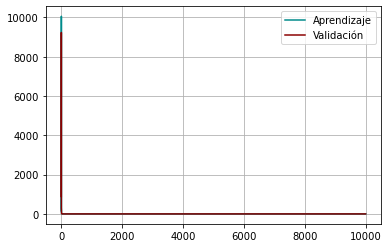

In [25]:
#neuralnet(X,Y,nodos,batch_size,learning_rate,epocas)

W1,b1,W2,b2=neuralnet(X,Y,100,.2,0.00001,10000,activation=relu,dactivation=drelu)

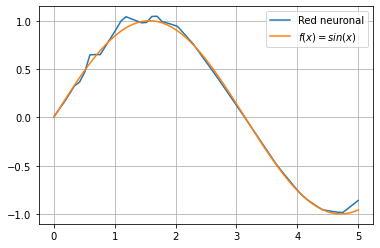

In [26]:
z=np.linspace(0,5,60)
z=z.reshape(60,1)
plt.plot(z,forward(z,W1,b1,W2,b2,relu),label='Red neuronal')
plt.plot(z,np.sin(z), label='$f(x)=sin(x)$')
plt.legend()
plt.grid()

Epoch 1/300
200/200 [==============================] - 1s 1ms/step - loss: 0.3560 - val_loss: 0.1591
Epoch 2/300
200/200 [==============================] - 0s 816us/step - loss: 0.1972 - val_loss: 0.1521
Epoch 3/300
200/200 [==============================] - 0s 841us/step - loss: 0.1443 - val_loss: 0.0956
Epoch 4/300
200/200 [==============================] - 0s 947us/step - loss: 0.1009 - val_loss: 0.0674
Epoch 5/300
200/200 [==============================] - 0s 807us/step - loss: 0.0631 - val_loss: 0.0360
Epoch 6/300
200/200 [==============================] - 0s 765us/step - loss: 0.0441 - val_loss: 0.0219
Epoch 7/300
200/200 [==============================] - 0s 648us/step - loss: 0.0298 - val_loss: 0.0120
Epoch 8/300
200/200 [==============================] - 0s 672us/step - loss: 0.0242 - val_loss: 0.0289
Epoch 9/300
200/200 [==============================] - 0s 831us/step - loss: 0.0244 - val_loss: 0.0209
Epoch 10/300
200/200 [==============================] - 0s 667us/step - los

Epoch 80/300
200/200 [==============================] - 0s 678us/step - loss: 0.0088 - val_loss: 0.0064
Epoch 81/300
200/200 [==============================] - 0s 679us/step - loss: 0.0087 - val_loss: 0.0102
Epoch 82/300
200/200 [==============================] - 0s 606us/step - loss: 0.0095 - val_loss: 0.0047
Epoch 83/300
200/200 [==============================] - 0s 683us/step - loss: 0.0085 - val_loss: 0.0092
Epoch 84/300
200/200 [==============================] - 0s 657us/step - loss: 0.0083 - val_loss: 0.0156
Epoch 85/300
200/200 [==============================] - 0s 670us/step - loss: 0.0089 - val_loss: 0.0083
Epoch 86/300
200/200 [==============================] - 0s 763us/step - loss: 0.0089 - val_loss: 0.0075
Epoch 87/300
200/200 [==============================] - 0s 662us/step - loss: 0.0093 - val_loss: 0.0152
Epoch 88/300
200/200 [==============================] - 0s 779us/step - loss: 0.0093 - val_loss: 0.0120
Epoch 89/300
200/200 [==============================] - 0s 631us

200/200 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0071
Epoch 237/300
200/200 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0112
Epoch 238/300
200/200 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0117
Epoch 239/300
200/200 [==============================] - 0s 965us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 240/300
200/200 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0056
Epoch 241/300
200/200 [==============================] - 0s 839us/step - loss: 0.0071 - val_loss: 0.0130
Epoch 242/300
200/200 [==============================] - 0s 668us/step - loss: 0.0074 - val_loss: 0.0059
Epoch 243/300
200/200 [==============================] - 0s 868us/step - loss: 0.0075 - val_loss: 0.0138
Epoch 244/300
200/200 [==============================] - 0s 691us/step - loss: 0.0076 - val_loss: 0.0110
Epoch 245/300
200/200 [==============================] - 0s 704us/step - loss

Text(0.5, 1.0, 'Error durante el entrenamiento')

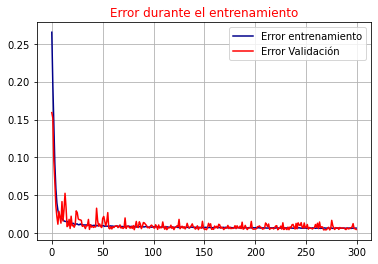

In [63]:
nodos=50
split_size=0.8
learning_rate=0.01
epocas=300

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X,Y,split_size)

#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
capa1=layers.Dense(nodos, input_shape=(len(X[0]),),use_bias=1,activation='relu')
#para la capa de salida usamos Id como activación
salida=layers.Dense(len(Y[0]),use_bias=1)

#armamos el modelo
model.add(capa1)
model.add(salida)
#Ahora definimos el paso de compilación, con learning rate=0.001
#Función de error cuadrático medio


model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='mse')

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),batch_size=4,epochs=epocas,shuffle=True)

error=history.history['loss']
exac=history.history['val_loss']
epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

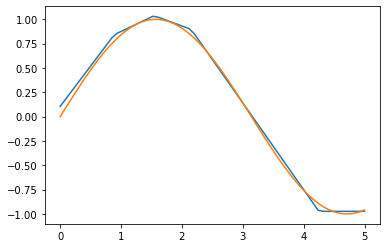

In [64]:
plt.plot(z,model.predict(z))
plt.plot(z,np.sin(z))

In [12]:
#Función a emular
def G(X):
    return [X[0]**2,X[1]**2]

X = 10*np.random.rand(1000,2)
Y=np.zeros((1000,2))

for i,x in enumerate(X):
    img=G(X[i])
    img=img+np.random.rand(1,2)
    Y[i,:]=img
    

### Parámetro de Hubble para $\Lambda CDM$

In [1]:
def Hlcdm(z, Om=0.27, H0=73.24):
    return H0 * np.sqrt(Om*(1+z)**3 + 1 - Om)

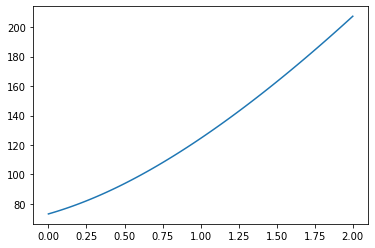

In [8]:
z = np.linspace(0,2, 100)
hz = Hlcdm(z)
plt.plot(z, hz)